In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('data-power.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
15034,10.0370,1022.1,88.531,2.9192,23.641,1083.6,549.91,132.61,11.745,1.65600,76.068
15035,9.8921,1022.2,87.622,2.9415,23.859,1084.9,550.08,133.57,11.869,1.55490,74.930
15036,9.8723,1022.0,86.618,2.9309,23.817,1084.8,549.99,133.50,11.914,1.40930,75.041
15037,10.0260,1022.0,87.301,2.9363,23.831,1084.5,550.01,133.20,11.811,1.39630,74.460


In [4]:
x = data[['AT', 'AP', 'AH']]
y = data['CO']

In [6]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 10)

In [9]:
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
target = linreg.predict(x_test)

Text(0, 0.5, 'Predict')

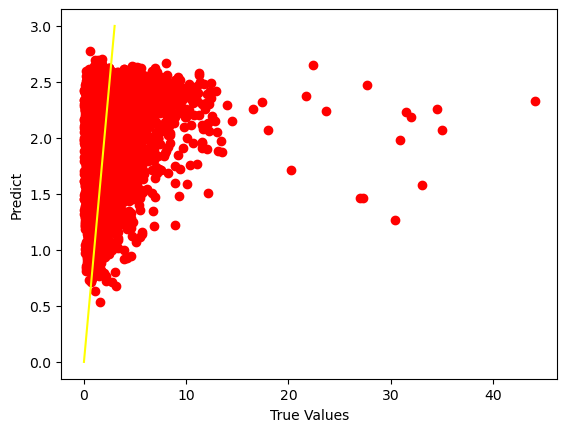

In [13]:
plt.figure()
plt.scatter(y_test, target, color = 'red')
plt.plot(range(4), range(4), color = 'yellow')
plt.xlabel('True Values')
plt.ylabel('Predict')

In [14]:
print('R-squared Score (training):', model.score(x_train, y_train))

R-squared Score (training): 0.029822301466625678


In [15]:
print('R-squared Score (test):', model.score(x_test, y_test))

R-squared Score (test): 0.027831675422701152


In [16]:
print('Coefficient (w):', linreg.coef_)

Coefficient (w): [0.01367738 0.01978128 0.03068716]


In [17]:
print('Intercept', linreg.intercept_)

Intercept -20.74149308410578


In [18]:
from sklearn import metrics

In [19]:
print('Mean Squared Error', metrics.mean_squared_error(y_test, target))

Mean Squared Error 4.658740477756943


In [20]:
print('Equation: CO ='+str(linreg.coef_[0])+'*AT +'+str(linreg.intercept_))

Equation: CO =0.013677375462387913*AT +-20.74149308410578


Belarde, Mark Joshua M.
2019104890

The R squared value of both training and test shows that there is only almost 3% of the variance in the dependent variable, Carbon Monoxide, can be explained by Ambient Temperature (AT), Ambient Pressure (AP), Ambient Humidity (AH). This tells us that the model is not a good fit for the data and that other additional independent variables are neede to improve the accuracy of the plot.

The plot consistently proves that there is a poor fit of the model as the points are more dispersed or scattered from the diagonal line.

The equation for predicting the target variable is CO = a + b(AT, AP, AH)